# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib
import math
plt.style.use('ggplot')
df = pd.read_csv('data/human_body_temperature.csv')

In [31]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


Question 1 Answer:  
Temperature sample distribution is somewhat normal...see chart below

Question 2 Answer:
Sample size is >30 so it is considered a large sample size.
Samples are independent because each sample person is unrelated to other sample people as best we know.

Question 3 Answer:
98.6 degrees is outside the 95% confidence interval suggesting that the population mean is unlikely to be 98.6 degrees.
Would use a 1 sample test because estimating the mean of a population and not comparing 2 sample distributions.
Would use the z statistic instead of t statistic because sample size is large (>30).
Using t statistic yields same result at z statistic since both look up tables have a score of 1.96 for 95% CI.
Can't use the 2 sample test because we don't have 2 sample distributions.  But computing a Z score of hypothesized population mean of 98.6 compared to sample mean shows a very high or unlikely z score of 5.45.

Question 4 Answer:
1 persons temperature would be considered abnormal if outside the 95% confidence interval for a sample size of 1.
Margin of error = 1.96 * 0.73 = 1.44     95% CI  96.8-99.7

Question 5 Answer (2 methods):

Method 1 Hypothesis Test:  
Null Hypothesis is that the temp difference between male and female samples is 0 or insignificant.
Alternative Hypothesis is that females do have higher temps then male.
Calculate a 95% critical value where we believe that the female temps are not higher then male temps.
     ## Critical value = 1.65 * combined sample std = 0.21
Since mean sample female temp - mean sample male temp = 0.29 which is greater then the 95% critical value we thus reject the Null Hypothesis and accept the Alternative Hypothesis that females temps are higher then male temps and the difference is not due to random sampling error.

Method 2 by rerandomizing the combined sample 1000 times and see how often the first half of the samples vs the second half of the samples shows a difference equal or greater then the male vs female sample difference:




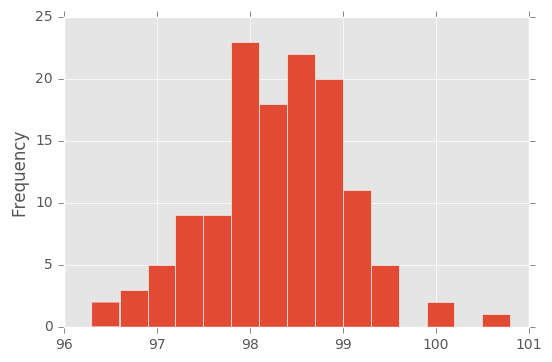

In [64]:
# Histogram of raw data
df['temperature'].plot.hist(bins=15)

In [65]:
# Question3:  computing the 95% confidence interval - z statistic of +/- 1.96
print('Sample Mean', df['temperature'].mean())
print('Sample Standard deviation', df['temperature'].std())
print('Standard Error', df['temperature'].std() / math.sqrt(130))
print('95% Confidence Interval ',(df['temperature'].mean() - (1.96 * df['temperature'].std() / math.sqrt(130))), ',',(df['temperature'].mean() + (1.96 * df['temperature'].std() / math.sqrt(130))) )
print('Z score of 98.6 mean vs Sample mean ',((98.6 - df['temperature'].mean()) / (df['temperature'].std() / math.sqrt(130))))

Sample Mean 98.24923076923078
Sample Standard deviation 0.7331831580389454
Standard Error 0.06430441683789101
95% Confidence Interval  98.12319411222852 , 98.37526742623304
Z score of 98.6 mean vs Sample mean  5.454823292364079


In [84]:
# Question 4:  95% confidence interval using z statistic (+/- 1.96)
print('Margin of Error ', df['temperature'].std()*1.96)
print('95% CI ',(df['temperature'].mean() - (1.96 * df['temperature'].std())), ',',(df['temperature'].mean() + (1.96 * df['temperature'].std())))

Margin of Error  1.437038989756333
95% CI  96.81219177947445 , 99.68626975898711


In [114]:
# Question 5 Method 1:
male = df[df.gender=='M']
female = df[df.gender=='F']
print('Male Temp Mean / Std / Sample Size = ', male['temperature'].mean(),male['temperature'].std(),male['temperature'].count())
print('Female Temp Mean / Std / Sample Size = ', female['temperature'].mean(),female['temperature'].std(),female['temperature'].count())
temp_diff = female['temperature'].mean() - male['temperature'].mean()
print('Female - Male Temp Difference = ', temp_diff)
print(' ')
std_of_2_samples = math.sqrt((male['temperature'].std()**2 / male['temperature'].count()) + (female['temperature'].std()**2 / female['temperature'].count()))
print('Std of the difference of the 2 samples = ', std_of_2_samples)
print('95% critical value =  ', 1.65 * std_of_2_samples)


Male Temp Mean / Std / Sample Size =  98.1046153846154 0.6987557623265908 65
Female Temp Mean / Std / Sample Size =  98.39384615384613 0.7434877527313665 65
Female - Male Temp Difference =  0.289230769230727
 
Std of the difference of the 2 samples =  0.12655395041982642
95% critical value =   0.20881401819271359


In [ ]:
# Question 5 Method 2:



